In [1]:
from experiments import *
from metrics import *
from config import *
import glob
from IPython.display import display, HTML

%load_ext autoreload
%autoreload 2

In [2]:
HTML("""<style>
    div.output_scroll div.output_subarea {
        overflow-x: auto;
    }    
</style>""")
pd.options.display.max_rows = pd.options.display.max_columns = 500

In [3]:
EXPERIMENT_PATH = Path(EXPERIMENTS_PATH) / 'model'

In [4]:
def load(csvName, path = str(EXPERIMENT_PATH), up='auto'):
    dfs = dict()
    groups = dict()
    for csv in sorted(glob.glob(path + "/**/" + csvName + ".csv", recursive=True)):
        df = dfs[csv] = pd.read_csv(csv, index_col = False)
        parents = Path(csv).parents
        depth = up
        if up == 'auto':
            depth = 0
            while parents[depth].name.isdigit():
                depth += 1
        group = parents[depth].name
        if group not in groups:
            groups[group] = list()
        groups[group].append(df)
    return dfs, groups     

def showAverageStats(groups, stats = None, pm = True):
    for group in groups.keys():
        if len(groups[group]) > 1:
            df_concat = pd.concat(groups[group])
            grouped = df_concat.groupby(df_concat.index)
        else:
            grouped = groups[group][0]
        printStats(grouped, group, stats = stats, pm = pm)
        if len(groups[group]) > 1:
            display(grouped.mean())
        else:
            display(pd.DataFrame([grouped.mean()]))

table6Stats = ["normal pixel f1 %", "normal global f1 score %", "normal pixel precision %", "normal pixel recall %", "drd", "psnr", "ignore pixel f1 %", "ignore global f1 score %"]            
normalStats = ["normal pixel f1 %", "normal pixel precision %", "normal pixel recall %", "drd", "psnr"]
specialStats = ["normal global f1 score %", "normal global precision %", "normal global recall %", "ignore global f1 score %", "ignore global precision %", "ignore global recall %"]

In [24]:
dfs, groups = load("final predictions")
showAverageStats(groups)

densenet169 FPN 0
 & $55.40 \pm 3.0$ & $51.04 \pm 1.1$ & $70.87 \pm 1.1$ & $71.09 \pm 2.2$ \\
 & $47.67 \pm 2.6$ & $81.40 \pm 5.9$ & $84.59 \pm 3.2$ & $84.53 \pm 5.0$ \\
 & $88.09 \pm 2.1$ & $80.88 \pm 3.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

densenet169 Linknet 0
 & $60.74 \pm 1.3$ & $53.85 \pm 1.3$ & $77.38 \pm 2.1$ & $76.71 \pm 1.3$ \\
 & $48.34 \pm 1.6$ & $86.57 \pm 1.9$ & $84.93 \pm 0.7$ & $90.47 \pm 1.5$ \\
 & $84.94 \pm 2.1$ & $90.64 \pm 2.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

densenet169 PSPNet 0
 & $37.34 \pm 12.0$ & $34.38 \pm 4.7$ & $44.12 \pm 12.0$ & $43.28 \pm 6.3$ \\
 & $50.07 \pm 6.7$ & $61.26 \pm 11.0$ & $82.37 \pm 9.3$ & $64.15 \pm 10.2$ \\
 & $81.23 \pm 11.3$ & $52.17 \pm 7.2$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

densenet169 Unet 0
 & $60.60 \pm 2.1$ & $56.25 \pm 1.4$ & $75.93 \pm 1.9$ & $77.36 \pm 1.9$ \\
 & $51.35 \pm 1.1$ & $81.96 \pm 1.8$ & $86.79 \pm 0.8$ & $87.26 \pm 1.4$ \\
 & $89.94 \pm 1.3$ & $87.92 \pm 2.7$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

dpn68 FPN 0
 & $53.37 \pm 2.5$ & $50.80 \pm 1.0$ & $68.99 \pm 2.1$ & $70.08 \pm 4.8$ \\
 & $45.55 \pm 5.5$ & $84.21 \pm 8.1$ & $80.81 \pm 5.7$ & $86.40 \pm 7.1$ \\
 & $95.34 \pm 0.7$ & $75.65 \pm 7.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

dpn68 Linknet 0
 & $42.53 \pm 1.4$ & $36.12 \pm 3.3$ & $61.63 \pm 1.6$ & $61.66 \pm 4.5$ \\
 & $33.00 \pm 1.1$ & $96.95 \pm 0.3$ & $67.81 \pm 1.3$ & $97.39 \pm 0.3$ \\
 & $68.03 \pm 7.1$ & $96.03 \pm 0.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

dpn68 PAN 0
 & $56.80 \pm 1.1$ & $48.80 \pm 1.6$ & $69.79 \pm 3.5$ & $65.10 \pm 3.1$ \\
 & $51.77 \pm 1.1$ & $70.14 \pm 2.9$ & $88.40 \pm 1.1$ & $74.62 \pm 2.8$ \\
 & $88.10 \pm 0.6$ & $75.10 \pm 4.6$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

dpn68 PSPNet 0
 & $8.27 \pm 1.2$ & $30.78 \pm 1.4$ & $12.01 \pm 1.6$ & $45.59 \pm 1.8$ \\
 & $22.32 \pm 1.7$ & $96.55 \pm 1.2$ & $37.66 \pm 3.0$ & $96.78 \pm 1.2$ \\
 & $86.75 \pm 3.9$ & $79.37 \pm 8.9$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

dpn68 Unet 0
 & $60.42 \pm 1.5$ & $55.19 \pm 2.1$ & $72.97 \pm 2.8$ & $73.42 \pm 3.6$ \\
 & $54.78 \pm 0.7$ & $75.13 \pm 2.7$ & $89.29 \pm 0.4$ & $81.72 \pm 2.5$ \\
 & $92.20 \pm 1.1$ & $81.20 \pm 4.6$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

efficientnet-b4 FPN 0
 & $58.60 \pm 1.4$ & $48.08 \pm 0.3$ & $73.15 \pm 3.3$ & $66.12 \pm 0.7$ \\
 & $50.79 \pm 1.1$ & $71.36 \pm 2.2$ & $87.58 \pm 0.9$ & $76.50 \pm 1.7$ \\
 & $81.41 \pm 2.4$ & $80.73 \pm 2.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

efficientnet-b4 Linknet 0
 & $10.36 \pm 2.6$ & $4.63 \pm 1.3$ & $15.94 \pm 3.7$ & $9.49 \pm 2.2$ \\
 & $31.24 \pm 9.6$ & $95.07 \pm 2.8$ & $65.71 \pm 17.9$ & $94.96 \pm 2.9$ \\
 & $8.01 \pm 2.3$ & $99.87 \pm 0.1$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

efficientnet-b4 PAN 0
 & $52.65 \pm 1.3$ & $47.74 \pm 1.1$ & $66.24 \pm 3.3$ & $66.06 \pm 3.3$ \\
 & $47.61 \pm 2.4$ & $77.27 \pm 3.1$ & $84.45 \pm 1.4$ & $80.55 \pm 2.9$ \\
 & $84.84 \pm 2.4$ & $76.53 \pm 6.1$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

efficientnet-b4 PSPNet 0
 & $36.88 \pm 2.7$ & $43.59 \pm 1.4$ & $41.16 \pm 3.3$ & $61.16 \pm 2.0$ \\
 & $45.32 \pm 1.4$ & $77.65 \pm 2.3$ & $78.36 \pm 1.2$ & $80.13 \pm 2.2$ \\
 & $73.46 \pm 2.5$ & $81.62 \pm 3.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

efficientnet-b4 Unet 0
 & $60.37 \pm 2.6$ & $55.61 \pm 1.3$ & $75.63 \pm 1.4$ & $76.54 \pm 1.0$ \\
 & $51.17 \pm 3.1$ & $83.18 \pm 3.6$ & $84.80 \pm 2.3$ & $88.71 \pm 2.1$ \\
 & $86.71 \pm 1.4$ & $90.13 \pm 2.1$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet34 0
 & $73.91 \pm 2.1$ & $74.65 \pm 1.2$ & $78.65 \pm 3.4$ & $85.70 \pm 1.3$ \\
 & $78.72 \pm 2.3$ & $88.26 \pm 2.2$ & $96.80 \pm 0.5$ & $93.64 \pm 1.2$ \\
 & $86.45 \pm 2.2$ & $93.84 \pm 1.8$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet50 FPN 0
 & $56.59 \pm 2.1$ & $51.51 \pm 0.6$ & $71.15 \pm 1.7$ & $70.48 \pm 1.3$ \\
 & $49.02 \pm 2.0$ & $77.85 \pm 3.4$ & $85.89 \pm 1.5$ & $81.65 \pm 2.9$ \\
 & $90.81 \pm 1.1$ & $78.86 \pm 1.9$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet50 Linknet 0
 & $56.61 \pm 1.5$ & $53.04 \pm 1.9$ & $74.34 \pm 1.5$ & $77.05 \pm 0.9$ \\
 & $45.90 \pm 2.4$ & $89.86 \pm 2.3$ & $82.63 \pm 1.7$ & $92.57 \pm 1.7$ \\
 & $85.27 \pm 2.1$ & $92.05 \pm 2.6$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet50 PAN 0
 & $55.04 \pm 3.1$ & $48.67 \pm 2.5$ & $69.38 \pm 2.7$ & $67.95 \pm 1.9$ \\
 & $49.62 \pm 2.0$ & $75.44 \pm 4.3$ & $86.89 \pm 1.7$ & $79.74 \pm 3.5$ \\
 & $80.46 \pm 5.5$ & $83.35 \pm 0.9$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet50 PSPNet 0
 & $34.00 \pm 11.5$ & $33.11 \pm 2.8$ & $40.23 \pm 11.6$ & $42.24 \pm 2.4$ \\
 & $48.87 \pm 8.2$ & $60.19 \pm 15.6$ & $81.43 \pm 13.4$ & $63.03 \pm 14.4$ \\
 & $77.61 \pm 12.7$ & $55.98 \pm 7.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

resnet50 Unet 0
 & $56.96 \pm 1.7$ & $55.04 \pm 1.8$ & $73.30 \pm 1.8$ & $78.83 \pm 1.6$ \\
 & $47.04 \pm 1.7$ & $89.14 \pm 2.4$ & $83.71 \pm 0.6$ & $92.24 \pm 1.6$ \\
 & $88.55 \pm 3.9$ & $91.45 \pm 1.9$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

segament 0
 & $47.97 \pm 5.4$ & $39.17 \pm 7.2$ & $50.54 \pm 6.3$ & $52.26 \pm 8.4$ \\
 & $62.50 \pm 2.2$ & $74.50 \pm 3.0$ & $95.74 \pm 0.5$ & $79.40 \pm 2.9$ \\
 & $47.49 \pm 10.5$ & $78.29 \pm 5.7$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

vgg16 FPN 0
 & $56.36 \pm 1.5$ & $48.92 \pm 0.6$ & $68.63 \pm 4.5$ & $67.57 \pm 0.7$ \\
 & $50.51 \pm 0.8$ & $73.53 \pm 1.2$ & $87.60 \pm 0.2$ & $78.52 \pm 1.1$ \\
 & $82.09 \pm 1.9$ & $81.20 \pm 1.4$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

vgg16 Linknet 0
 & $56.70 \pm 1.2$ & $42.28 \pm 2.5$ & $72.04 \pm 2.6$ & $63.33 \pm 3.0$ \\
 & $47.96 \pm 1.7$ & $90.60 \pm 1.3$ & $84.23 \pm 0.9$ & $93.71 \pm 1.0$ \\
 & $58.68 \pm 4.7$ & $94.49 \pm 1.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

vgg16 PSPNet 0
 & $46.67 \pm 3.7$ & $45.58 \pm 1.2$ & $55.84 \pm 7.9$ & $58.54 \pm 1.9$ \\
 & $49.21 \pm 0.5$ & $70.44 \pm 2.7$ & $81.08 \pm 1.1$ & $72.84 \pm 2.5$ \\
 & $88.61 \pm 1.4$ & $67.89 \pm 2.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

vgg16 Unet 0
 & $60.48 \pm 0.9$ & $57.70 \pm 1.0$ & $75.17 \pm 2.7$ & $80.12 \pm 0.9$ \\
 & $51.02 \pm 0.8$ & $87.49 \pm 1.2$ & $86.46 \pm 0.4$ & $91.75 \pm 1.0$ \\
 & $88.11 \pm 2.3$ & $92.14 \pm 0.7$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

xception 0
 & $61.61 \pm 5.6$ & $62.48 \pm 3.2$ & $67.48 \pm 7.1$ & $79.35 \pm 4.2$ \\
 & $63.31 \pm 2.8$ & $82.24 \pm 3.0$ & $95.50 \pm 0.6$ & $87.03 \pm 2.5$ \\
 & $88.97 \pm 2.4$ & $85.60 \pm 4.9$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [28]:
sickzil = load("metrics", str(EXPERIMENTS_PATH + '/sickzil'))[1]['experiments']
yu = load("final predictions", str(EXPERIMENTS_PATH + '/model/xception'))[1]['xception']
ours = load("final refined predictions 2", str(EXPERIMENTS_PATH))[1]['resnet34']

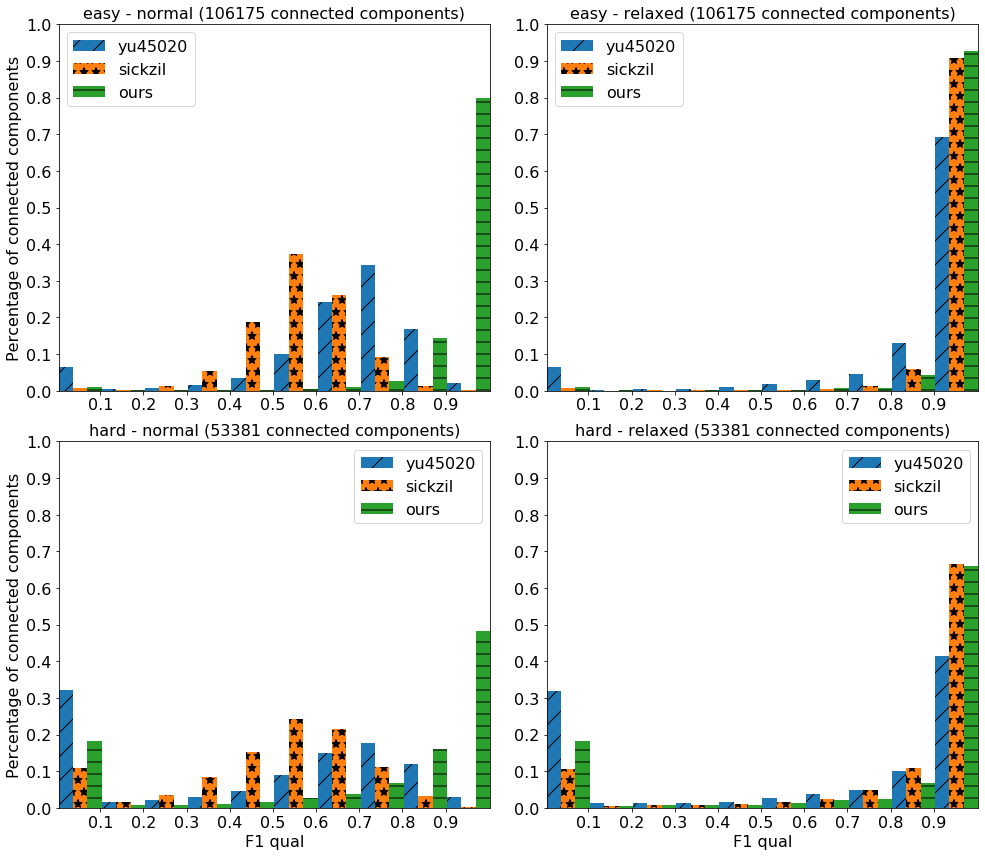

In [63]:
configs = [
    {'data': yu, 'labels': ['yu45020']},
    {'data': sickzil, 'labels': ['sickzil']},
    {'data': ours, 'labels': ['ours']}
]
MetricsCallback(None).showHistograms(configs, ["f1"], xlabel="F1 qual")

In [16]:
dfs, groups = load("predictions",  str(EXPERIMENTS_PATH + '/datasets'), up = 'auto')
groups['synthetic'] = load("final predictions",  str(EXPERIMENTS_PATH + '/synthetic'), up = 0)[1]['synthetic']
showAverageStats(groups, stats=["normal pixel f1 %", "normal pixel precision %", "normal pixel recall %", "drd", "psnr"])

dibco 0
 & $26.32$ & $19.09$ & $42.37$ & $74.71$ & $11.64$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

icdar2013-scene 0
 & $45.86$ & $39.37$ & $54.91$ & $38.14$ & $14.53$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

icdar2013-web 0
 & $40.90$ & $51.94$ & $33.73$ & $28.42$ & $16.22$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

kaist 0
 & $45.69$ & $44.55$ & $46.90$ & $32.64$ & $15.30$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

manga 0
 & $76.22 \pm 1.7$ & $80.41 \pm 2.6$ & $72.50 \pm 2.3$ & $12.83 \pm 1.5$ & $21.06 \pm 0.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

total-text 0
 & $42.49$ & $47.10$ & $38.70$ & $29.19$ & $15.66$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

synthetic 0
 & $57.03$ & $76.01$ & $45.64$ & $18.88$ & $18.24$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [6]:
dfs, groups = load("predictions",  str(EXPERIMENTS_PATH + '/datasets'), up = 'auto')
groups['synthetic'] = load("final predictions",  str(EXPERIMENTS_PATH + '/synthetic'), up = 0)[1]['synthetic']
showAverageStats(groups, ["normal global f1 score %"] + normalStats)

dibco 0
 & $13.47$ & $26.32$ & $19.09$ & $42.37$ & $74.71$ & $11.64$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

icdar2013-scene 0
 & $40.47$ & $45.86$ & $39.37$ & $54.91$ & $38.14$ & $14.53$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

icdar2013-web 0
 & $39.67$ & $40.90$ & $51.94$ & $33.73$ & $28.42$ & $16.22$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

kaist 0
 & $29.17$ & $45.69$ & $44.55$ & $46.90$ & $32.64$ & $15.30$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

manga 0
 & $82.64 \pm 1.7$ & $76.22 \pm 1.7$ & $80.41 \pm 2.6$ & $72.50 \pm 2.3$ & $12.83 \pm 1.5$ & $21.06 \pm 0.5$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

total-text 0
 & $42.79$ & $42.49$ & $47.10$ & $38.70$ & $29.19$ & $15.66$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

synthetic 0
 & $42.83$ & $57.03$ & $76.01$ & $45.64$ & $18.88$ & $18.24$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [20]:
dfs, groups = load("final refined predictions 2",  str(EXPERIMENTS_PATH + '/model/resnet34'))
showAverageStats(groups, stats=table6Stats, pm=False)

resnet34 0
 & $79.36$ & $84.92$ & $82.26$ & $76.71$ & $11.15$ & $21.91$ & $80.43$ & $89.26$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [19]:
dfs, groups = load("final refined predictions 2",  str(EXPERIMENTS_PATH + '/loss/dice'))
showAverageStats(groups, stats=table6Stats, pm=False)

dice 0
 & $75.82$ & $83.29$ & $75.53$ & $76.32$ & $14.06$ & $21.35$ & $76.87$ & $87.50$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [25]:
dfs, groups = load("final predictions",  str(EXPERIMENTS_PATH + '/model/xception'))
showAverageStats(groups, stats=table6Stats, pm=False)

xception 0
 & $61.61$ & $62.48$ & $61.25$ & $62.09$ & $20.66$ & $17.77$ & $67.48$ & $79.35$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [24]:
dfs, groups = load("final predictions",  str(EXPERIMENTS_PATH + '/model/segament'))
showAverageStats(groups, stats=table6Stats, pm=False)

segament 0
 & $47.97$ & $39.17$ & $49.43$ & $46.88$ & $28.12$ & $16.12$ & $50.54$ & $52.26$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [26]:
dfs, groups = load("metrics",  str(EXPERIMENTS_PATH + '/sickzil'))
showAverageStats(groups, stats=table6Stats, pm=False)

sickzil 0
 & $52.07$ & $49.33$ & $41.77$ & $69.15$ & $35.75$ & $14.71$ & $64.66$ & $84.94$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [15]:
dfs, groups = load("predictions",  str(EXPERIMENTS_PATH + '/BDUNET'))
showAverageStats(groups, stats=table6Stats, pm=False)

BDUNET 0
 & $30.24$ & $15.08$ & $40.54$ & $27.32$ & $39.42$ & $14.80$ & $27.38$ & $16.19$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [16]:
dfs, groups = load("predictions",  str(EXPERIMENTS_PATH + '/hrnet'))
showAverageStats(groups, stats=table6Stats, pm=False)

hrnet 0
 & $51.64$ & $51.34$ & $43.40$ & $63.85$ & $33.27$ & $15.40$ & $63.36$ & $74.41$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard

In [19]:
dfs, groups = load("final predictions",  str(EXPERIMENTS_PATH + '/synthetic'))
showAverageStats(groups, stats=table6Stats, pm=False)

synthetic 0
 & $57.08$ & $42.76$ & $75.94$ & $45.79$ & $18.90$ & $18.24$ & $51.13$ & $50.99$ \\


,#truth,#pred,#fp no intersect,#intersections,#subn,drd_k sum,drd,average drd,psnr,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard